In diesem Projekt geht es in erster Linie um Datenbereinigung.
Gearbeitet wird mit zwei Datensätzen
- exit surveys from employees of the Department of Education, Training and Employment (DETE)
- exit surveys from employees of the Technical and Further Education (TAFE) institute in Queensland, Australia.

Diese sollen im Verlauf zusammengeführt werden.

Folgenden Fragen soll in dieser Mission nachgegangen werden:


- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey=pd.read_csv("dete_survey.csv")

In [3]:
tafe_survey=pd.read_csv("tafe_survey.csv")

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Cease Date ist als String definiert.

Spalten wie z.B. "Kept informed" oder "Wellness Program", "Health and Safety" haben eine boolsche Logik, sind aber als String definiert.

"Nt Stated" =/= NaN

In [5]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [6]:
dete_survey.isnull().sum().sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Performance of supervisor                9
Initiative 

Dete_survey besitzt in folgenden Spalten überwiegend fehlende Daten (n < 1/2 Zeilenanzahl):

Torres Strait
South Sea
Aboriginal
Disability
NESB
Business Unit

Außerdem häufig fehlend:

Classification

Da die Daten nicht primär wichtig für die Beantwortung der eingangs gestellten Fragen sind, können diese Spalten (sowie zahlreiche weitere, die keinen inhaltlichen Mehrwert bieten) komplett entfernt werden.

In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Die ID besitzt ein unnötiges wissenschaftliches Format.

Das Jahr ist unnötigerweise float.

Fehlende Daten sind entweder NaN oder "-"

Current Age ist womöglich zweimal erfasst worden. Befindet sich allerdings in der gleichen Spalte.

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [9]:
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?                                                                                                     589
InductionInfo. Topic:Did you undertake a Corporate Induction?                                                                                                    270
Contributing Factors. Ill Health                                                                                                                                 265
Contributing Factors. Maternity/Family                                                                                                                           265
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributing Factors. NONE                                                                                                                                       265
Contributi

Der Hauptgrund, weshalb das Unternehmen verlassen worden war, ist in fast allen Zeilen nicht audgefüllt. Dieser ist aber der wichtigste Datenpunkt. Die Information müsste aus anderen Spalten des Datensatzes berechnet werden (z.B. "Reason for ceasing employment").

Contributing Factors. Hiervon ist fast die Hälfte nicht ausgefüllt.

Im allgemeinen liegen viele fehlende Daten vor.

## Hier beginnt der Datensäuberungs-Prozess

#1. Not Stated --> NaN

In [10]:
dete_survey=pd.read_csv("dete_survey.csv",na_values="Not Stated")

#2. Nicht benötigte Spalten (-> ohne Bezug zu den Eingangsfragen) werden entfernt.

In [11]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)

In [12]:
dete_survey_updated.shape

(822, 35)

In [13]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [14]:
tafe_survey_updated.shape

(702, 23)

#3. Anpassung der Spalten-Namen

In [15]:
dete_survey_updated.columns=(dete_survey_updated.columns.str.lower()
                            .str.strip()
                            .str.replace(" ","_")
                            )

In [16]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [17]:
columns_rename=({"Record ID":"id","CESSATION YEAR":"cease_date","Reason for ceasing employment":"separationtype",
                "Gender. What is your Gender?":"gender","CurrentAge. Current Age":"age","Employment Type. Employment Type":"employment_status",
                "Classification. Classification":"position","LengthofServiceOverall. Overall Length of Service at Institute (in years)":"institute_service"})

tafe_survey_updated.rename(columns_rename,inplace=True,axis=1)

In [18]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [19]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [20]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Um das Zusammenführen beider Datensätze zu erleichtern, wurden die Spalten-Namen aller relevanten Spalten aneinander angepasst.

#4. Entfernen aller nicht-benötigten Spalten

In [21]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [22]:
dete_res_selector=dete_survey_updated["separationtype"].str.contains(r"(Resignation)")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


In [23]:
dete_resignations=dete_survey_updated.loc[dete_res_selector]

In [24]:
dete_resignations=dete_resignations.copy()

In [25]:
dete_resignations.shape

(311, 35)

In [26]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [27]:
tafe_resignations=tafe_survey_updated.loc[tafe_survey_updated["separationtype"]=="Resignation"]

In [28]:
tafe_resignations=tafe_resignations.copy()

In [29]:
tafe_resignations.shape

(340, 23)

#4. Überprüfung der Jahresdaten auf logische Inkonsistenzen

In [30]:
dete_resignations["cease_date"].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [31]:
dete_resignations["cease_date"]=dete_resignations["cease_date"].str.extract(r"(20[0-1][0-9])")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [32]:
dete_resignations["cease_date"]=dete_resignations["cease_date"].astype(float)

In [33]:
dete_resignations["cease_date"].value_counts(dropna=False).sort_index(ascending=False)

 2014.0     22
 2013.0    146
 2012.0    129
 2010.0      2
 2006.0      1
NaN         11
Name: cease_date, dtype: int64

In [34]:
dete_resignations["dete_start_date"].value_counts(dropna=False).sort_index(ascending=False)

 2013.0    10
 2012.0    21
 2011.0    24
 2010.0    17
 2009.0    13
 2008.0    22
 2007.0    21
 2006.0    13
 2005.0    15
 2004.0    14
 2003.0     6
 2002.0     6
 2001.0     3
 2000.0     9
 1999.0     8
 1998.0     6
 1997.0     5
 1996.0     6
 1995.0     4
 1994.0     6
 1993.0     5
 1992.0     6
 1991.0     4
 1990.0     5
 1989.0     4
 1988.0     4
 1987.0     1
 1986.0     3
 1985.0     3
 1984.0     1
 1983.0     2
 1982.0     1
 1980.0     5
 1977.0     1
 1976.0     2
 1975.0     1
 1974.0     2
 1973.0     1
 1972.0     1
 1971.0     1
 1963.0     1
NaN        28
Name: dete_start_date, dtype: int64

In [35]:
tafe_resignations["cease_date"].value_counts(dropna=False).sort_index(ascending=False)

 2013.0     55
 2012.0     94
 2011.0    116
 2010.0     68
 2009.0      2
NaN          5
Name: cease_date, dtype: int64

Auf den ersten Blick zeigen sich keine groben Inkonsistenzen.
Für genauere Aussagen ist eine Untersuchung der korrespondierenden Werte der Start- und Endjahre notwendig.

#5 Der TAFE-Datensatz enthält bereits eine Spalte, welche die Arbeitszeit quantifiziert ("institute_service").
Der DETE-Datensatz benötigt eine vergleichbare Datenspalte.

Diese kann aus der Differenz des Start- und Enddatums erstellt werden

In [36]:
dete_resignations["institute_service"]=dete_resignations["cease_date"]-dete_resignations["dete_start_date"]

In [37]:
dete_resignations["institute_service"].value_counts(dropna=False).sort_index(ascending=False)

 49.0     1
 42.0     1
 41.0     1
 39.0     3
 38.0     1
 36.0     2
 35.0     1
 34.0     1
 33.0     1
 32.0     3
 31.0     1
 30.0     2
 29.0     1
 28.0     2
 27.0     1
 26.0     2
 25.0     2
 24.0     4
 23.0     4
 22.0     6
 21.0     3
 20.0     7
 19.0     3
 18.0     5
 17.0     6
 16.0     5
 15.0     7
 14.0     6
 13.0     8
 12.0     6
 11.0     4
 10.0     6
 9.0     14
 8.0      8
 7.0     13
 6.0     17
 5.0     23
 4.0     16
 3.0     20
 2.0     14
 1.0     22
 0.0     20
NaN      38
Name: institute_service, dtype: int64

## Hier beginnt der Datenauswertungs-Teil

#1. Identifikation unzufriedener Mitarbeiter


    tafe_survey_updated:
        Contributing Factors. Dissatisfaction
        Contributing Factors. Job Dissatisfaction
    dete_survey_updated:
        job_dissatisfaction
        dissatisfaction_with_the_department
        physical_work_environment
        lack_of_recognition
        lack_of_job_security
        work_location
        employment_conditions
        work_life_balance
        workload

Grundgedanke: Wenn einer der oben beschriebenen Faktoren positiv beantwortet wurde --> Markierung des Mitarbeits als unzufrieden

In [38]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [39]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Umwandlung in eine boolsche Logik

In [40]:
def update_vals(col):
    if pd.isnull(col)==True:
        a=np.nan
    elif col=="-":
        a=False
    else:
        a=True
    return a

In [41]:
tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
8,-,-
9,-,-
10,-,-
13,-,-
14,Contributing Factors. Dissatisfaction,Job Dissatisfaction


In [42]:
tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]]=tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]].applymap(update_vals)

In [43]:
tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
14,True,True


In [44]:
tafe_resignations["dissatisfied"]=tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]].any(axis=1, skipna=False)

In [45]:
tafe_resignations["dissatisfied"]

3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
13     False
14      True
15     False
16       NaN
17      True
18       NaN
19     False
20      True
21     False
22     False
23     False
24     False
26      True
27     False
29     False
32     False
36     False
37     False
39     False
40      True
41     False
42     False
       ...  
659    False
660    False
661     True
665    False
666    False
669    False
670      NaN
671     True
675     True
676    False
677    False
678    False
679    False
681    False
682    False
683    False
684    False
685     True
686    False
688    False
689     True
690    False
691    False
693    False
694    False
696    False
697    False
698    False
699    False
701    False
Name: dissatisfied, Length: 340, dtype: object

In [46]:
dete_resignations.dtypes

id                                       int64
separationtype                          object
cease_date                             float64
dete_start_date                        float64
role_start_date                        float64
position                                object
classification                          object
region                                  object
business_unit                           object
employment_status                       object
career_move_to_public_sector              bool
career_move_to_private_sector             bool
interpersonal_conflicts                   bool
job_dissatisfaction                       bool
dissatisfaction_with_the_department       bool
physical_work_environment                 bool
lack_of_recognition                       bool
lack_of_job_security                      bool
work_location                             bool
employment_conditions                     bool
maternity/family                          bool
relocation   

In [47]:
dete_resignations["dissatisfied"]=dete_resignations[dete_resignations.columns[[13,14,15,16,17,18,19,25,26]]].any(axis=1,skipna=False)

In [48]:
dete_resignations["dissatisfied"]

3      False
5       True
8      False
9       True
11     False
12     False
14      True
16      True
20     False
21     False
22      True
23      True
25      True
27     False
33      True
34      True
37     False
39      True
40     False
41      True
42     False
43      True
48     False
50     False
51     False
55     False
57     False
61     False
69      True
71     False
       ...  
747    False
751     True
752    False
753     True
755    False
762    False
766    False
769    False
770    False
771    False
774    False
784     True
786     True
788    False
789    False
790     True
791     True
794    False
797    False
798    False
802    False
803    False
804    False
806    False
807     True
808    False
815    False
816    False
819     True
821    False
Name: dissatisfied, Length: 311, dtype: bool

In [49]:
dete_resignations[dete_resignations.columns[[13,14,15,16,17,18,19,25,26,-1]]]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload,dissatisfied
3,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,True
8,False,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False,True
11,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False
14,True,True,False,False,False,False,False,False,False,True
16,False,False,False,True,False,False,False,False,False,True
20,False,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False,False


In [50]:
dete_resignations_up=dete_resignations.copy()

In [51]:
tafe_resignations_up=tafe_resignations.copy()

#2. Zusammenführung der Datensätze

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

In [52]:
dete_resignations_up["institute"]="DETE"

In [53]:
tafe_resignations_up["institue"]="TAFE"

In [54]:
combined=pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)

In [55]:
combined.shape

(651, 54)

Entfernen aller Spalten, die weniger als 500 Nicht-NA-Datensätze beinhalten.

In [56]:
combined_updated=combined.dropna(axis=1,thresh=500)

In [57]:
combined_updated.shape

(651, 9)

In [58]:
combined_updated.columns

Index(['age', 'cease_date', 'dissatisfied', 'employment_status', 'gender',
       'id', 'institute_service', 'position', 'separationtype'],
      dtype='object')

Bereinigen der "institute_service"-Spalte

In [59]:
combined_updated["institute_service"].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

In [60]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


Wir sehen, dass die Daten sehr unterschiedlich kategorisiert sind. Um diese zu verarbeiten ist eine Anpassung, bzw. Rekategorisierung nötig

Rekategorisierung anhand dieses Artikels: https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage

d.h.: 
   - New: Less than 3 years at a company
   - Experienced: 3-6 years at a company
   - Established: 7-10 years at a company
   - Veteran: 11 or more years at a company


In [61]:
combined_updated["institute_service"]=combined_updated["institute_service"].astype("str")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [62]:
combined_updated.dtypes

age                   object
cease_date           float64
dissatisfied          object
employment_status     object
gender                object
id                   float64
institute_service     object
position              object
separationtype        object
dtype: object

In [63]:
combined_updated["institute_service"]

0                   7.0
1                  18.0
2                   3.0
3                  15.0
4                   3.0
5                  14.0
6                   5.0
7                   nan
8                  30.0
9                  32.0
10                 15.0
11                 39.0
12                 17.0
13                  7.0
14                  9.0
15                  6.0
16                  1.0
17                  nan
18                 35.0
19                 38.0
20                  1.0
21                 36.0
22                  3.0
23                  3.0
24                 19.0
25                  4.0
26                  9.0
27                  1.0
28                  6.0
29                  1.0
             ...       
621                 1-2
622                 3-4
623                 5-6
624                 nan
625                 nan
626                 3-4
627                 nan
628    Less than 1 year
629    Less than 1 year
630                 1-2
631    Less than

In [64]:
combined_updated["institute_service"]=combined_updated["institute_service"].str.extract(r"([0-9]+)")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [65]:
combined_updated["institute_service"]

0        7
1       18
2        3
3       15
4        3
5       14
6        5
7      NaN
8       30
9       32
10      15
11      39
12      17
13       7
14       9
15       6
16       1
17     NaN
18      35
19      38
20       1
21      36
22       3
23       3
24      19
25       4
26       9
27       1
28       6
29       1
      ... 
621      1
622      3
623      5
624    NaN
625    NaN
626      3
627    NaN
628      1
629      1
630      1
631      1
632      3
633      1
634      1
635      1
636      1
637      3
638      1
639      5
640      5
641      1
642    NaN
643      3
644      1
645    NaN
646      5
647      1
648    NaN
649      5
650      3
Name: institute_service, Length: 651, dtype: object

In [66]:
combined_updated["institute_service"]=combined_updated["institute_service"].astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [67]:
def map_career_stage(row):
    if pd.isnull(row)==True:
        return np.nan
    elif row<3:
        return "New"
    elif row<7:
        return "Experienced"
    elif row<11:
        return "Established"
    elif row>11:
        return "Veteran"

In [68]:
combined_updated["service_cat"]=combined_updated["institute_service"].apply(map_career_stage)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [69]:
combined_updated["service_cat"]

0      Established
1          Veteran
2      Experienced
3          Veteran
4      Experienced
5          Veteran
6      Experienced
7              NaN
8          Veteran
9          Veteran
10         Veteran
11         Veteran
12         Veteran
13     Established
14     Established
15     Experienced
16             New
17             NaN
18         Veteran
19         Veteran
20             New
21         Veteran
22     Experienced
23     Experienced
24         Veteran
25     Experienced
26     Established
27             New
28     Experienced
29             New
          ...     
621            New
622    Experienced
623    Experienced
624            NaN
625            NaN
626    Experienced
627            NaN
628            New
629            New
630            New
631            New
632    Experienced
633            New
634            New
635            New
636            New
637    Experienced
638            New
639    Experienced
640    Experienced
641            New
642         

#3. Analysis

In [70]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [71]:
combined_updated["dissatisfied"].fillna(False,inplace=True)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [72]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [73]:
combined_updated.pivot_table(index="service_cat",values="dissatisfied")

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.556604


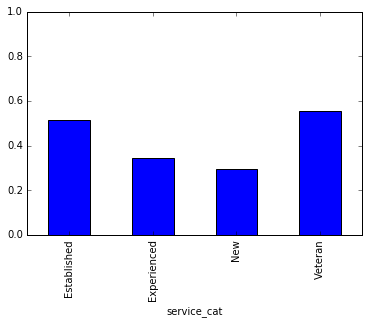

In [77]:
%matplotlib inline
combined_updated.pivot_table(index="service_cat",values="dissatisfied").plot(kind="bar",legend=False,ylim=(0,1))

Es gibt einen positiven Zusammenhang zwischen der Karrierestufe und dem Anteil der Jobwechsler aus Unzufriedenheitsgründen.